# ML - Classification with an Academic Success

# Part 1 - Business problem

- **CRISP-DM (Cross Industry Standard Process for Data Mining)**

**CRISP-DM Phases**

- Business Understanding

- Understanding Data

- Data Preparation

- Modeling

- Assessment

- Implementation

## 1. Business Understanding

**Business Objectives:**

**Identify At-Risk Students:**

- Anticipate which students are at academic risk to implement preventive interventions.

**Increase Retention Rate:**

- Improve retention rates by providing adequate support to students who need it most.

**Optimize Resources:**

- Direct support and counseling resources efficiently, focusing on the most at-risk students.

**Success Criteria:**

- **Model Accuracy:** The model must achieve a high enough accuracy to be useful in real contexts.

- **Impact on Interventions:** The model's ability to enable effective interventions that improve academic performance and retention.

## 2. Data Understanding

- Data Collection:

**Data Source:**

- CSV files provided (training and testing).

**Content:**

- Demographic data, academic records, socioeconomic data, among others.

**Data Description**

**Variables:**

- **Ex.:** age, sex, grades, attendance, family income.

- **Target:** Academic risk (categorized, for example, as low, medium, high).

**Initial Exploration**

- **Descriptive Statistics:** Measures such as mean, median, mode, standard deviation.

- **Distributions:** Visualization of distributions of continuous and categorical variables.

- **Missing Values:** Identification and analysis of missing data.

## 3. Data Preparation

**Data Cleansing:**

- **Missing Values:** Treatment of missing values ​​through imputation or removal.

- **Outliers:** Identification and treatment of extreme values.

**Data Transformation**

- **Coding:** Conversion of categorical variables into numeric ones (one-hot encoding or label encoding).

- **Normalization/Standardization:** Normalize or standardize variables as necessary.

**Feature Engineering**

- **Creation of New Variables:** Combination of existing variables to create new attributes that may be relevant.

## 4. Modeling

**Model Selection**

- **Initial Models:** Logistic Regression, KNN, Decision Trees.

- **Advanced Models:** Random Forest, Gradient Boosting, XGBoost.

**Division of Data**

- Training and Validation: Separate data into training and validation sets.

**Training:**

- **Model Tuning:** Train models with different parameters and cross-validation techniques.

## 5. Assessment

**Performance Metric**

- **Accuracy:** Proportion of correct predictions.

- **Other Metrics:** Confusion matrix, precision, recall, F1-score.

**Validation**

- **Cross Validation:** Evaluate model performance using cross validation.

- **Validation Set Test:** Evaluate the model on the validation set to ensure that it generalizes well to new data.

## 6. Deployment

**Forecast Generation**

- **Test Set:** Use the trained model to predict academic risks in the test set.

**Submission File Creation:**

**Format:** Generate the submission file according to the required format (id and Target columns).

**Continuous evaluation**

**Monitoring:** Implement continuous monitoring of model performance and adjustments as necessary.

**Review:** Periodically review and refine the model with new data to maintain relevance and accuracy.

## Summary of Proposed Solution

With the CRISP-DM framework, you can approach the problem in an organized and systematic way, ensuring that all important steps are covered. Here is a code example that implements the data preparation, modeling, and evaluation phases.

**This business problem was developed using the CRISP-DM methodology**

**More information**

[CRISP-DM Overview](https://www.ibm.com/docs/en/spss-modeler/18.5.0?topic=dm-crisp-help-overview)

In [1]:
# Installing packages
!pip install watermark

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [3]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.13
Author: Library versions

numpy     : 1.26.4
re        : 2.2.1
matplotlib: 3.7.5
plotly    : 5.18.0
seaborn   : 0.12.2
pandas    : 2.2.2
watermark : 2.4.3



# Part 2 - Database

In [4]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Loading dataset
train_df = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")

In [5]:
# Viewing first 5 data
train_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [6]:
# Viewing 5 latest data
train_df.tail()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
76513,76513,1,17,1,9254,1,1,121.0,1,19,1,7,5,116.5,1,0,0,1,0,1,18,0,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,38,4,9,131.6,1,0,0,1,0,0,19,0,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,37,9,10,123.3,1,0,0,1,0,0,19,0,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,37,5,9,124.8,1,0,0,1,0,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout
76517,76517,1,1,1,9773,1,1,133.1,1,19,19,4,9,131.0,1,0,0,1,0,0,19,0,0,6,6,6,12.833333,0,0,6,6,6,13.666667,0,15.5,2.8,-4.06,Graduate


In [7]:
# Info data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [8]:
# Type dados
train_df.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [9]:
# Viewing rows and columns
train_df.shape

(76518, 38)

## Part 2 - Exploratory data analysis

In [10]:
# Exploratory data analysis (EDA)
print("\nDescriptive statistics of the training set:")
train_df.describe().T


Descriptive statistics of the training set:


,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000


In [11]:
# Analysis of categorical and numerical variables
categorical_features = train_df.select_dtypes(include=['object']).columns
numerical_features = train_df.select_dtypes(include=[np.number]).columns

print("\nCategorical Variables:", categorical_features)
print("Numeric Variables:", numerical_features)


Categorical Variables: Index(['Target'], dtype='object')
Numeric Variables: Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluati

In [12]:
# Analysis of categorical variables
for col in categorical_features:
    print(f"\nDistribution of categorical variable {col}:")
    print(train_df[col].value_counts())


Distribution of categorical variable Target:
Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64


- Aqui podemos ver uma análise de varaiveis categoricas junto com a variavel alvo.


Distribution of target variable 'Target':
Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64


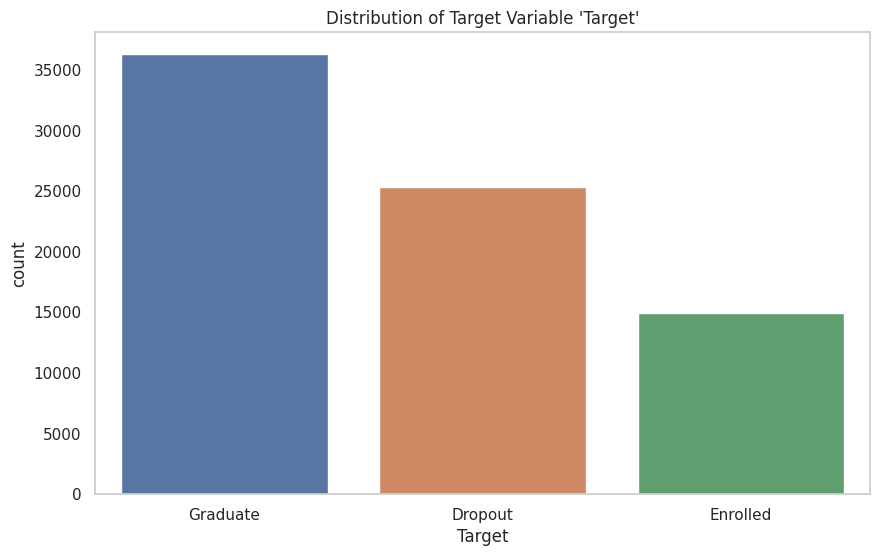

In [13]:
# Analysis of target variable 'Target'
print("\nDistribution of target variable 'Target':")
print(train_df['Target'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Target')
plt.title("Distribution of Target Variable 'Target'")
plt.grid(False)
plt.show()

Here we can observe in this bar chart the variables related to the students, as well as the target variable. The chart provides a clear visual representation, allowing for a comparative analysis between the different variables. It facilitates the identification of patterns, trends, and correlations, aiding in the understanding of the relationships between the students' variables and the target variable.

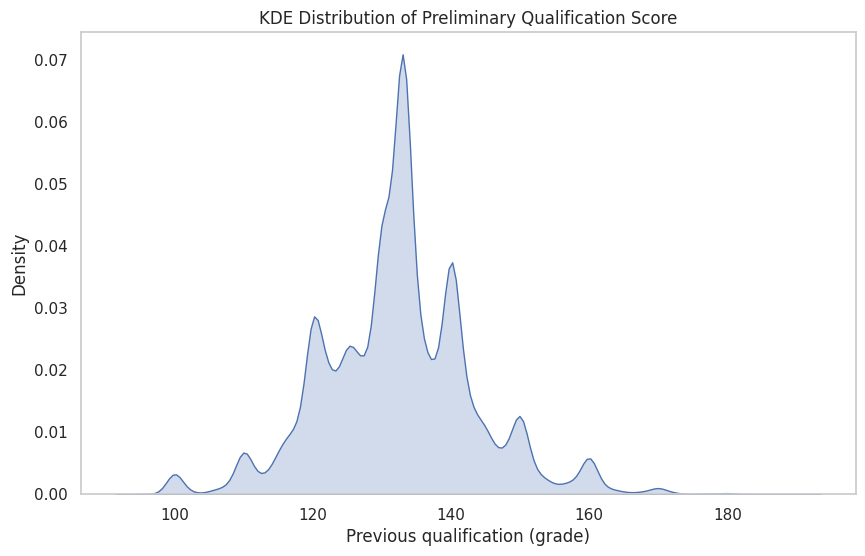

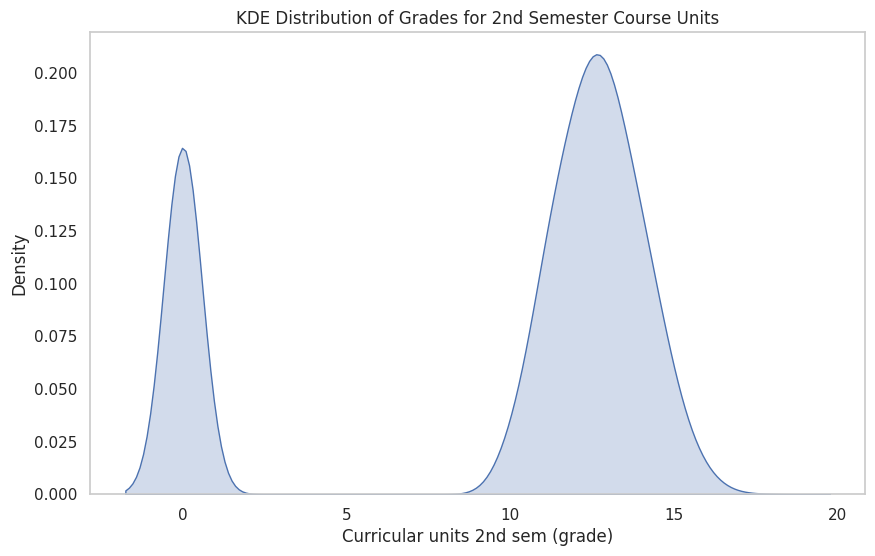

In [14]:
# Variables of interest
numerical_features = ['Previous qualification (grade)', 'Curricular units 2nd without (grade)',
 'Unemployment rate', 'Inflation rate', 'GDP']

# Categorical variables
categorical_features = ['Marital status', 'Application mode', 'Daytime/evening attendance',
 'Nationality', 'Mother\'s qualification']

# Variables of interest
numerical_features = ['age', 'income', 'gpa']

# Categorical variables and features
categorical_features = ['gender', 'major']


# 1. Distribution of Numerical Variables with KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['Previous qualification (grade)'], shade=True)
plt.title('KDE Distribution of Preliminary Qualification Score')
plt.grid(False)
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['Curricular units 2nd sem (grade)'], shade=True)
plt.title('KDE Distribution of Grades for 2nd Semester Course Units')
plt.grid(False)
plt.show()

Here we can see in this graph the KDE Distribution of the Previous Qualification Grades and the KDE Distribution of the Second Semester Course Grades. The graph allows us to analyze the density of the grades, making it easier to visualize areas with higher data concentration and compare the distributions of the previous grades with the second semester grades. This is useful for identifying performance trends and patterns over time.

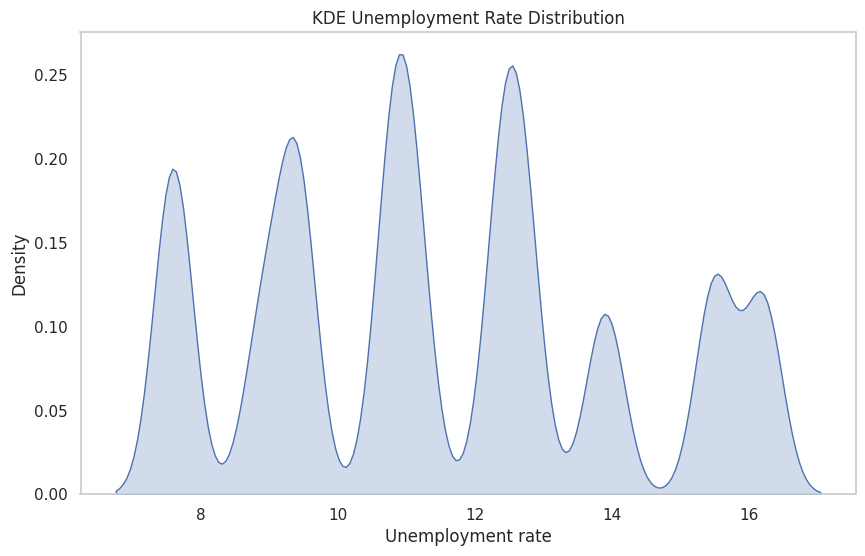

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['Unemployment rate'], shade=True)
plt.title('KDE Unemployment Rate Distribution')
plt.grid(False)
plt.show()

Here, in this graph, we can see the KDE Distribution of the overall Unemployment Rate. This graph allows us to analyze the density of the unemployment rates, making it easier to visualize areas with higher data concentration. Additionally, we can identify trends and patterns in the behavior of the unemployment rate over time, which is crucial for an in-depth analysis of the labor market.

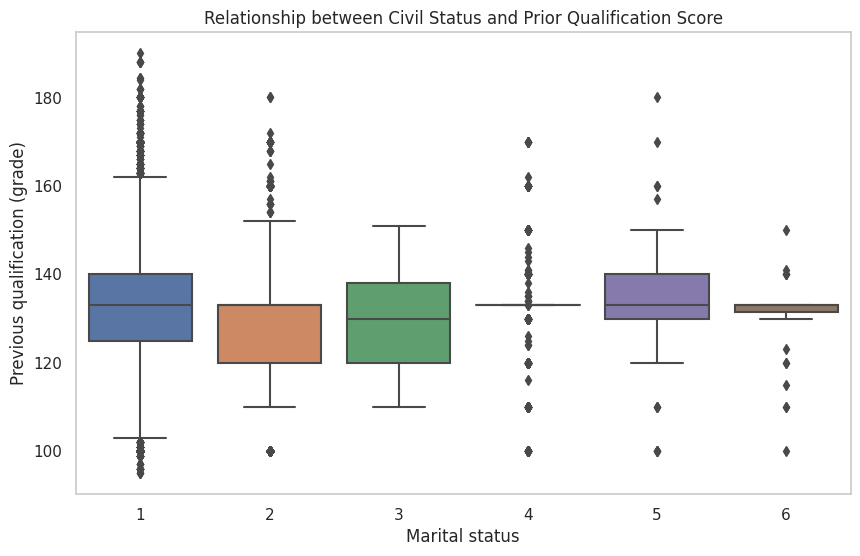

In [16]:
#4. Boxplot for Categorical Variables vs. Categorical Variables Numeric
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital status', y='Previous qualification (grade)', data=train_df)
plt.title('Relationship between Civil Status and Prior Qualification Score')
plt.grid(False)
plt.show()

Here, in this graph, we can see a boxplot depicting the relationship between marital status and previous qualification grades. The graph highlights outliers and provides a detailed view of the grade distribution across different marital statuses. It facilitates the comparison of medians, quartiles, and variability of the grades, offering a deeper analysis of the potential influence of marital status on prior academic performance.

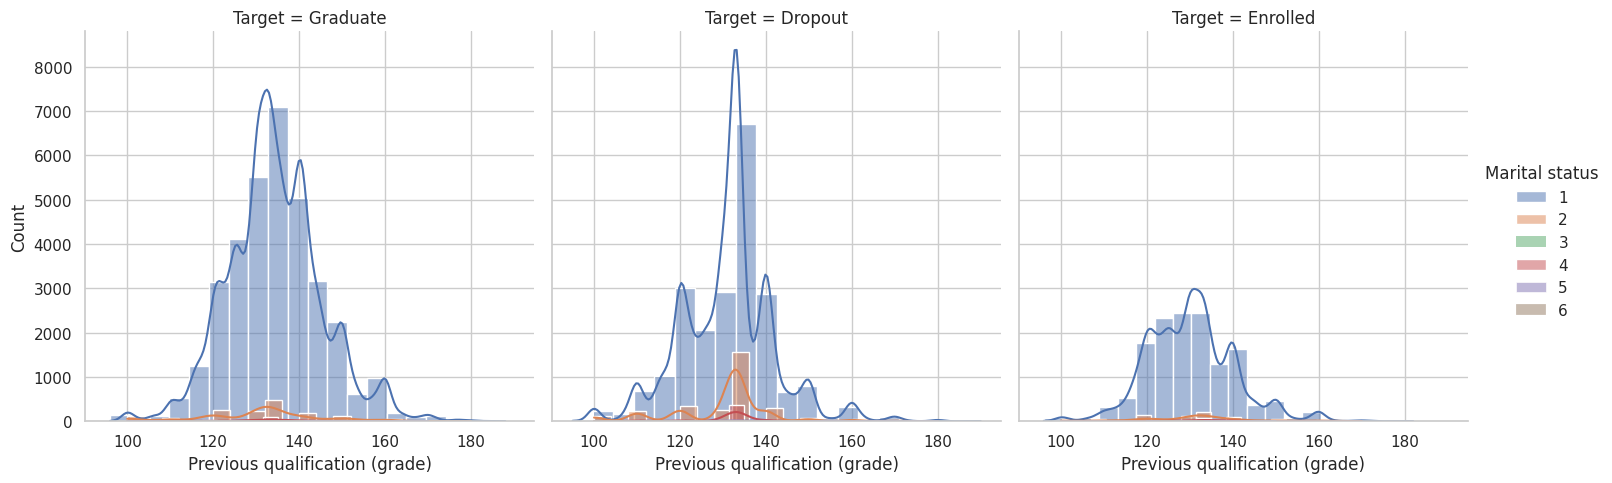

In [17]:
#6. FacetGrid for Multivariate Analysis
# Example: Numeric variable 'Previous qualification (grade)' and categorical variable 'Marital status'
g = sns.FacetGrid(train_df, col='Target', hue='Marital status', height=5)
g.map(sns.histplot, 'Previous qualification (grade)', kde=True, bins=20)
g.add_legend()

plt.show()

O gráfico mostra a distribuição das notas de qualificações anteriores de alunos em relação ao seu estado de destino (graduado, desistente ou matriculado) e ao status marital. Aqui está uma análise detalhada de cada gráfico:

**1. Gráfico à Esquerda (Target = Graduate)**

- A maioria dos alunos graduados tem notas de qualificações anteriores entre aproximadamente 110 e 140.

- Há um pico significativo em torno de 120-130.

- As cores representam diferentes status maritais, mas a cor predominante é a cor 1 (provavelmente solteiro), indicando que a maioria dos graduados tem esse status marital.

**2. Gráfico do Meio (Target = Dropout)**

- A maioria dos alunos que desistiram tem notas de qualificações anteriores entre aproximadamente 110 e 130.

- Há um pico muito pronunciado em torno de 120.

- Novamente, a cor predominante é a cor 1, sugerindo que muitos desistentes também têm o mesmo status marital predominante dos graduados.

**3. Gráfico à Direita (Target = Enrolled)**

- A distribuição das notas dos alunos matriculados é mais dispersa, com a maioria das notas variando entre 100 e 140.

- Há picos menores em torno de 120 e 130.

- A cor predominante é, novamente, a cor 1, mostrando que muitos dos matriculados compartilham o mesmo status marital que os outros grupos.

**Conclusões Gerais:**

- A distribuição das notas para os três estados (graduado, desistente, matriculado) é semelhante, com picos notáveis em torno de 120-130.

- O status marital mais comum entre todos os estados parece ser o 1.

- Os desistentes tendem a ter uma distribuição de notas um pouco mais estreita em torno de 120, enquanto os graduados e matriculados têm distribuições ligeiramente mais amplas.

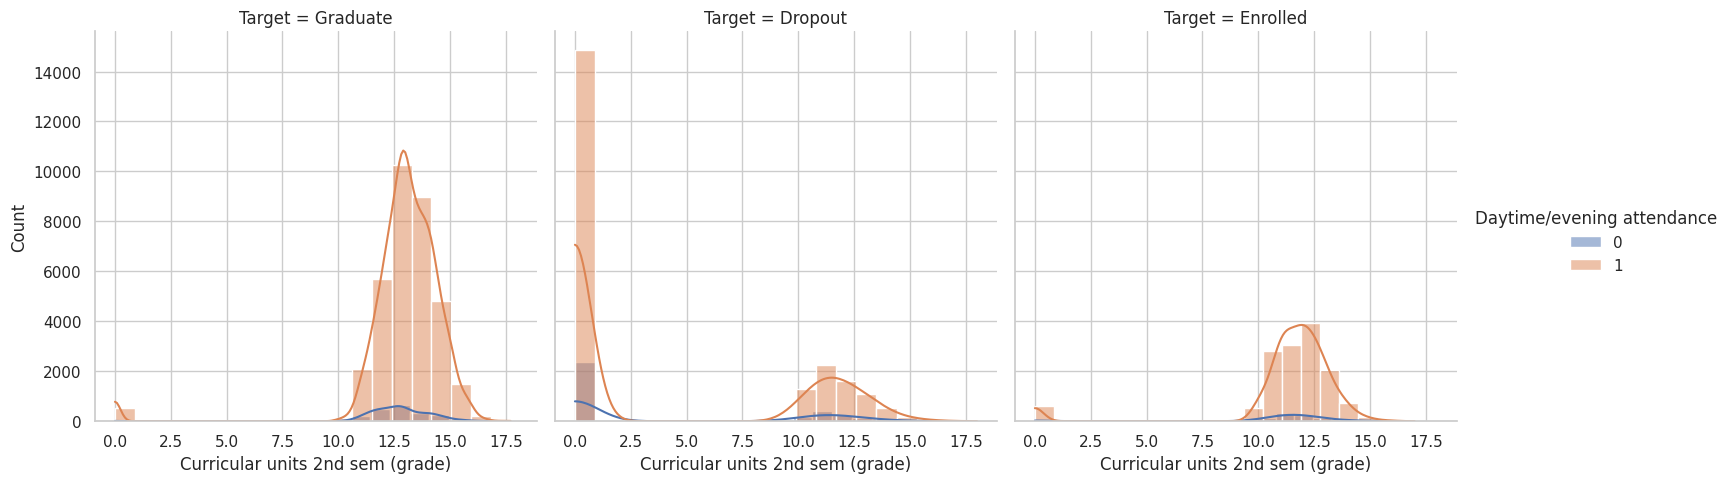

In [18]:
# FacetGrid for multivariate analysis with 'Curricular units 2nd without (grid)'
g = sns.FacetGrid(train_df, col='Target', hue='Daytime/evening attendance', height=5)
g.map(sns.histplot, 'Curricular units 2nd sem (grade)', kde=True, bins=20)
g.add_legend()
plt.show()

The graph shows the distribution of grades in the curricular units of the second semester in relation to the students' destination state (graduated, dropped out or enrolled) and the type of attendance (day or night). Let's analyze each graph in detail:

**1. Graph on the Left (Target = Graduate)**

- Most graduating students have grades between approximately 10 and 15.

- The highest peak is between 12.5 and 13.

- The predominant color is color 1 (probably nocturnal), suggesting that the majority of graduates attended classes at night.

**two. Middle Chart (Target = Dropout)**

- The distribution of grades for dropping out students is quite different, with a very high peak at 0.

- This suggests that many students who dropped out were unable to complete the course units in the second semester.

- The predominant color is again color 1 (night).

**3. Right Graph (Target = Enrolled)**

- The majority of enrolled students have grades between 10 and 13.

- There is a peak around 12.5.

- The predominant color is color 1 (night), indicating that the majority of those enrolled also attend classes at night.

**General Conclusions**

- Graduated and enrolled students have similar grade distributions, with most grades ranging between 10 and 15 and peaks around 12.5.

- Many students who dropped out did not complete the course units in the second semester, evidenced by the peak at 0.

- The majority of students, regardless of their destination state, seem to attend classes at night.

These graphs show how performance in the second semester curricular units is associated with the students' destination state and highlight the prevalence of night attendance among all groups.

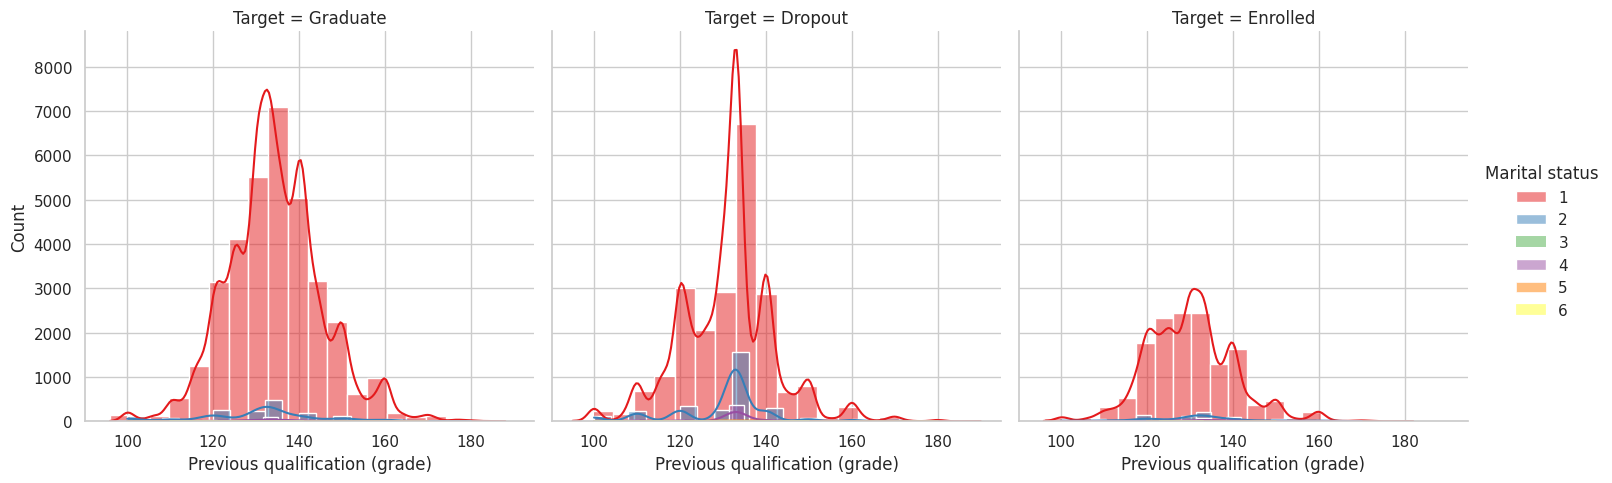

In [19]:
#5. FacetGrid for Multivariate Analysis with Color Palettes
# Example: Numeric variable 'Previous qualification (grade)' and categorical variable 'Marital status'
g = sns.FacetGrid(train_df, col='Target', hue='Marital status', height=5, palette='Set1')
g.map(sns.histplot, 'Previous qualification (grade)', kde=True, bins=20)
g.add_legend()
plt.show()

This graph shows the distribution of students' previous qualification grades in relation to their destination state (graduated, dropped out or enrolled) and marital status. Let's analyze each of the graphs in detail:

**1. Graph on the Left (Target = Graduate)**

- Most graduates have previous qualifications scores between approximately 110 and 140.

- There is a significant peak around 120-130.

- The predominant color is color 1 (red), indicating that the majority of graduates have this marital status.

**two. Middle Chart (Target = Dropout)**

- The majority of students who withdraw have grades from previous qualifications between approximately 110 and 130.

- There is a very pronounced peak around 120.

- Again, the predominant color is color 1 (red), suggesting that many dropouts also have the same predominant marital status as graduates.

**3. Right Graph (Target = Enrolled)**

- The distribution of grades for enrolled students is more dispersed, with the majority of grades varying between 100 and 140.

- There are smaller peaks around 120 and 130.

- The predominant color is, again, color 1 (red), showing that many of those enrolled share the same marital status as the other groups.

**General Conclusions**

- The distribution of grades for the three states (graduated, dropped out, enrolled) is similar, with notable peaks around 120-130.

- The most common marital status among all states appears to be 1 (red).

- Dropouts tend to have a slightly narrower grade distribution around 120, while graduates and enrollees have slightly wider distributions.

These graphs help visualize the relationship between past academic performance (in terms of grades) and academic destiny, along with a demographic variable such as marital status. Marital status 1 is predominant across all groups, which may indicate a common trend or characteristic among students in these different destination states.

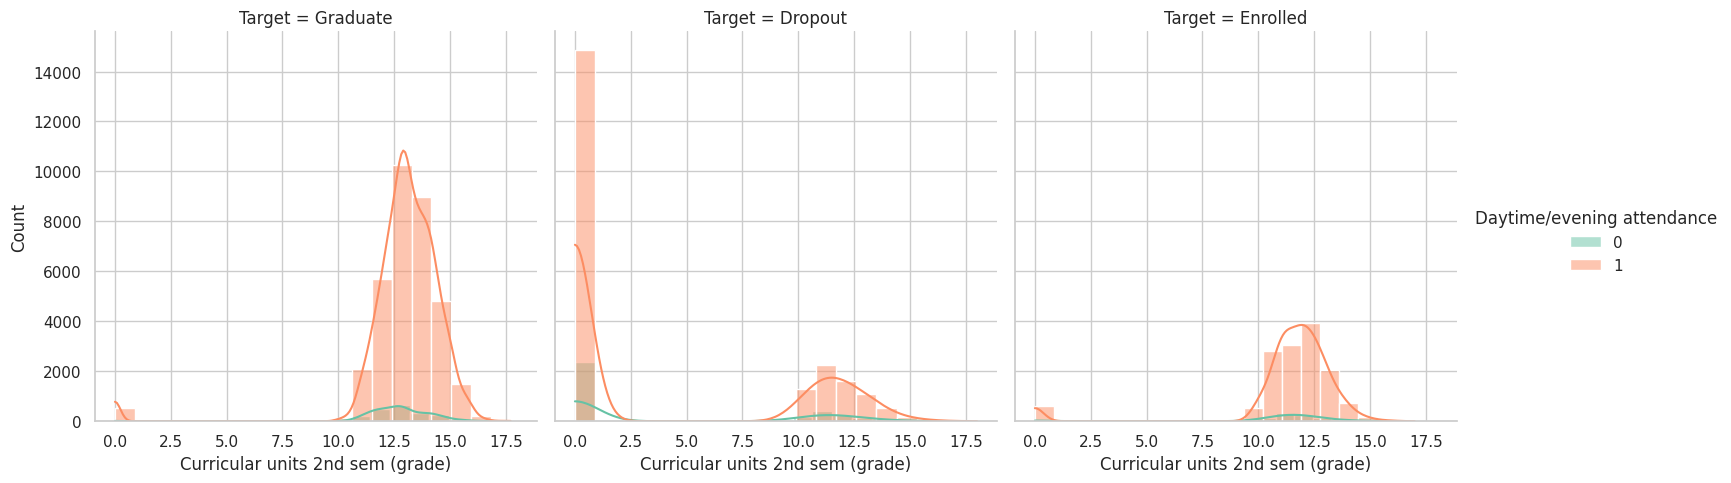

In [20]:
# FacetGrid para análise multivariada com 'Curricular units 2nd sem (grade)'
g = sns.FacetGrid(train_df, col='Target', hue='Daytime/evening attendance', height=5, palette='Set2')
g.map(sns.histplot, 'Curricular units 2nd sem (grade)', kde=True, bins=20)
g.add_legend()
plt.show()

The uploaded graph shows the distribution of grades in curricular units for the second semester, divided into three different categories: Graduate, Dropout, and Enrolled. The graph is further divided based on whether the students attended classes during the daytime or evening (daytime/evening attendance). Let's break down the observations from each of the subplots.

## Graduate

**Daytime Attendance (0):**

- The distribution peaks around 12-15, with a significant number of students having grades in this range.

- A smaller number of students have grades below 10.

**Evening Attendance (1):**

- The distribution is similar to daytime attendance, but with a slightly broader range.

- Most students have grades between 10 and 15.

## Dropout

**Daytime Attendance (0):**

- A sharp peak at 0, indicating that a large number of students who dropped out had very low or no grades.

- A smaller, secondary peak around 10-12.

**-Evening Attendance (1):**

- Similar to daytime attendance, but the peak at 0 is less pronounced.

- A noticeable peak around 10, with fewer students compared to daytime.

## Enrolled

- **Daytime Attendance (0):**

- The distribution peaks around 10-12.

- A small number of students have grades below 10.

- **Evening Attendance (1):**

- The distribution is very similar to daytime attendance.

- The peak is slightly broader, ranging from 10 to 13.

## Key Observations

**1. Graduates** Tend to have higher grades in the 2nd semester, predominantly between 10 and 15.

**two. Dropouts**: Show a bimodal distribution, with a significant peak at 0 (indicating very low or no grades) and another around 10-12.

**3. Enrolled**: Students' grades mostly fall between 10 and 13, suggesting that maintaining a certain grade range is common among those still enrolled.

**4. Daytime vs Evening Attendance:**

- The distribution patterns for daytime and evening attendance are quite similar across all categories.

- Daytime attendees in the dropout category show a sharper peak at 0 compared to evening attendees, suggesting that evening attendees might be slightly more resilient or have better support structures.

- This analysis helps to understand the performance and retention trends based on grades and the time of attendance. Students with higher grades are more likely to graduate, while those with very low grades are more likely to drop out.

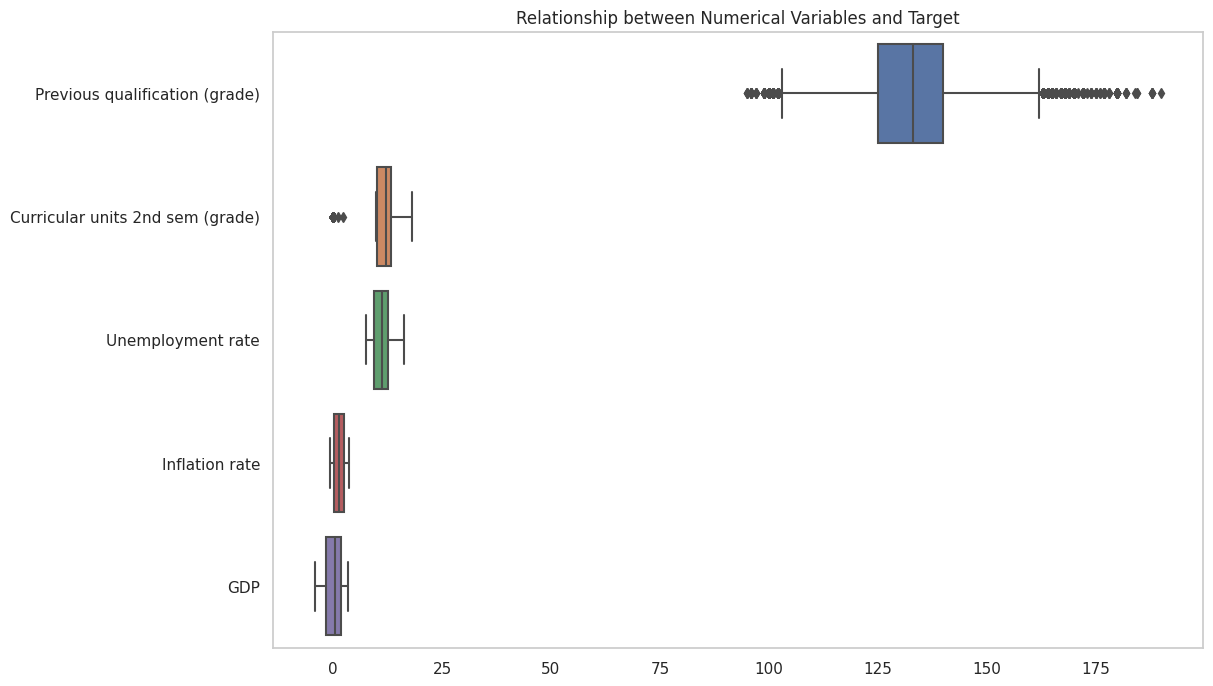

In [21]:
# 3. Analyze Distributions of Numerical Variables
numerical_features = ['Previous qualification (grade)', 
                      'Curricular units 2nd sem (grade)', 
                      'Unemployment rate', 
                      'Inflation rate', 
                      'GDP']

# 4. Analyze Distributions of Categorical Variables
categorical_features = ['Marital status', 
                        'Application mode', 
                        'Daytime/evening attendance',
                        'Nacionality', 
                        'Mother\'s qualification']

# 6. Investigate Relationships Between Variables and the Target (Target)
# Relationship between numeric variables and Target
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_df[numerical_features + ['Target']], orient="h")
plt.title('Relationship between Numerical Variables and Target')
plt.grid(False)
plt.show()

The uploaded graph shows the relationship between several numerical variables and the target variable, likely representing different student statuses (e.g., Graduate, Dropout, Enrolled) through box plots. Let's break down each variable and its distribution:

## Variables

1. Previous qualification (grade)

2. Curricular units 2nd sem (grade)

3. Unemployment rate

4. Inflation rate

5. GDP

## Observations

1. **Previous qualification (grade)**

- The distribution is broad, indicating a wide range of previous qualification grades.

- The median is around the middle of the box, suggesting a relatively symmetrical distribution.

- There are numerous outliers on both ends, indicating variability in previous qualification grades among students.

2. **Curricular units 2nd sem (grade)**

- The distribution is tighter compared to the previous qualification grades.

- The median is close to the center of the box.

- There are a few outliers on the lower end, suggesting some students have significantly lower grades.

3. **Unemployment rate**

- The distribution is relatively narrow, indicating that the unemployment rate does not vary widely among the samples.

- The median is close to the center of the box, and the whiskers suggest a symmetrical distribution with fewer outliers.

4. **Inflation rate**

- Similar to the unemployment rate, the distribution of the inflation rate is narrow.

- The box plot indicates a tight clustering around the median with very few outliers.

5. **GDP**

- The GDP distribution is similar to that of unemployment and inflation rates, showing a tight range.

- The median is centrally located with a few outliers, indicating some variability.

## Key Insights

- **Previous qualification (grade):** And curricular units 2nd sem (grade) show wider ranges and more variability, which could imply that students' academic performance both before and during the second semester varies significantly.

- **Economic indicators:** Such as unemployment rate, inflation rate, and GDP are tightly clustered, suggesting less variability and potentially consistent economic conditions across the dataset.

- **Outliers in academic grades** (both previous qualifications and second-semester grades) might indicate exceptional cases that could be worth investigating further to understand their impact on the target variable.

## Summary

This graph provides a visual representation of how various numerical factors relate to the target variable. The academic performance indicators show more variability compared to the economic indicators, which are more stable. Understanding these distributions can help in analyzing how different factors influence student outcomes.

# Part 3 - Data cleaning

In [22]:
# 1. Handling Missing Values
print("Number of missing values ​​per column:")
print(train_df.isnull().sum())

Number of missing values ​​per column:
id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                   

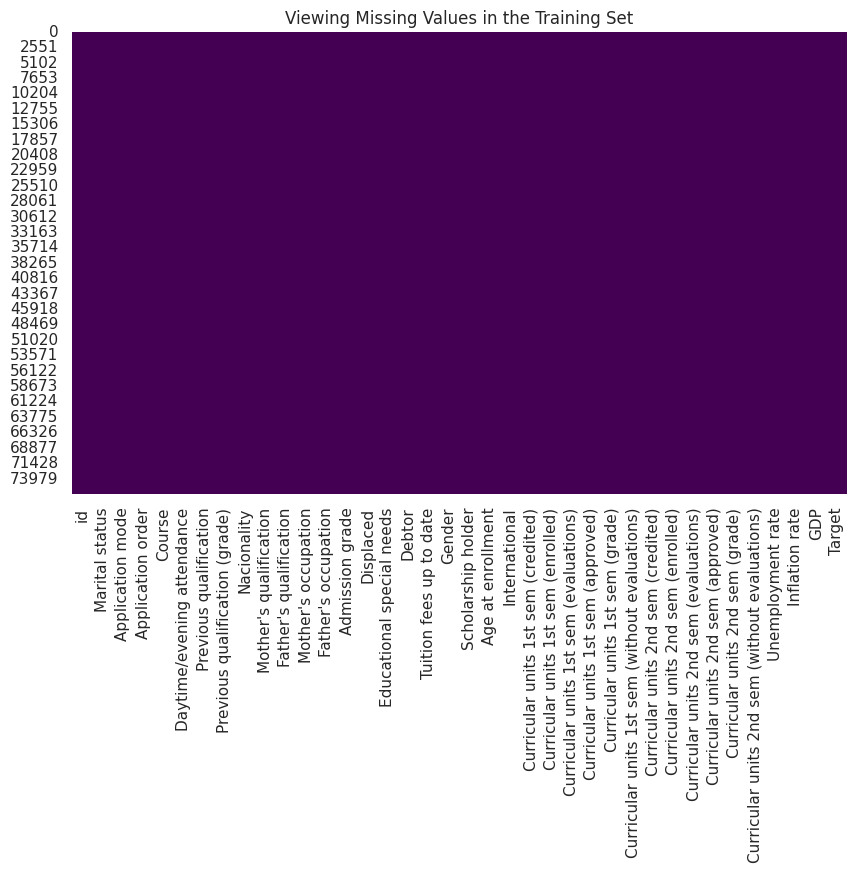

In [23]:
# View missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Viewing Missing Values in the Training Set")
plt.show()

## Key Observations

**Uniform Color**

- The entire heatmap is dark purple, indicating that there are no missing values in any of the features for any samples in the dataset.

**2. Features:**

- The x-axis lists all the features included in the dataset. These features range from personal information (e.g., marital status, application mode) to academic performance (e.g., previous qualification grades, curricular units grades) and socio-economic indicators (e.g., unemployment rate, GDP).

**3. Samples**

- The y-axis represents the sample indices, ranging from 0 to around 75,000, suggesting a large dataset with 75,000 samples.

## Implications

**Data Completeness**

- The absence of missing values simplifies the data preprocessing steps. No imputation or deletion of samples/features due to missing values is necessary.

**Data Quality**

- High data quality is indicated, as missing values often necessitate additional handling that can introduce uncertainty or bias.

**Analysis and Modeling**

- With complete data, the focus can be on feature engineering, exploratory data analysis, and model building without concerns about missing value treatments.

## Summary
This heatmap confirms that the dataset is fully populated with no missing values across all features and samples. This allows for straightforward and robust data analysis and model development without the need for handling missing data.








In [24]:
# If there are missing values, we can fill them with the mean, median or mode depending on the type of variable
# Fill in missing values with the median for numeric variables

#median_values = train_df.median()
#train_df.fillna(median_values, inplace=True)

In [25]:
# Remove duplicate lines if any
#train_df.drop_duplicates(inplace=True)

# Part 4 - Feature engineering

In [26]:
# Viewing column
train_df.Target.head()

0    Graduate
1     Dropout
2     Dropout
3    Enrolled
4    Graduate
Name: Target, dtype: object

In [27]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
train_df['Target_2'] = label_encoder.fit_transform(train_df['Target'])

# Viewing
label_encoder

LabelEncoder()

- Aqui podemos ver foi feito Label Encoder na varaivel categorica para númerica 

# Part 5 – Preprocessing

In [28]:
# Rename the columns
train_df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
train_df.head()

,id,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,mother's_occupation,father's_occupation,admission_grade,displaced,educational_special_needs,debtor,tuition_fees_up_to_date,gender,scholarship_holder,age_at_enrollment,international,curricular_units_1st_sem_(credited),curricular_units_1st_sem_(enrolled),curricular_units_1st_sem_(evaluations),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target,target_2
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate,2
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout,0
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout,0
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled,1
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate,2


In [29]:
# Delete the 'Name' column, for example
train_df.drop(columns=['target'], inplace=True)
train_df

,id,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,mother's_occupation,father's_occupation,admission_grade,displaced,educational_special_needs,debtor,tuition_fees_up_to_date,gender,scholarship_holder,age_at_enrollment,international,curricular_units_1st_sem_(credited),curricular_units_1st_sem_(enrolled),curricular_units_1st_sem_(evaluations),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target_2
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,2
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,0
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,1
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,1,7,5,116.5,1,0,0,1,0,1,18,0,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79,2
76514,76514,1,1,6,9254,1,1,125.0,1,1,38,4,9,131.6,1,0,0,1,0,0,19,0,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,2
76515,76515,5,17,1,9085,1,1,138.0,1,37,37,9,10,123.3,1,0,0,1,0,0,19,0,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,1
76516,76516,1,1,3,9070,1,1,136.0,1,38,37,5,9,124.8,1,0,0,1,0,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,7.6,2.6,0.32,0


Here we can see the application of label encoder on the categorical target variable. Label encoder converts categorical values into numerical values, enabling machine learning algorithms to process this information efficiently. This process is essential for modeling as it facilitates data interpretation and the identification of patterns that can be used for predictions. Additionally, the transformation helps improve the accuracy of models by ensuring that all variables are in the appropriate format for analysis.

# Part 6 - Target column division

In [30]:
# Resources
X = train_df.drop(columns=['target_2'])

# Target variable
y = train_df['target_2']

In [31]:
# Visualizing data x
X.shape

(76518, 37)

In [32]:
# Viewing y data
y.shape

(76518,)

Here, we performed the division of the variables into features and the target variable. First, we separated the independent variables, which are the features used for predictive modeling. These features are the input data that the model will use to learn patterns and make predictions. Next, we isolated the dependent variable, or the target variable, which is the value we aim to predict. This process is crucial for building and training the model, ensuring that the features are correctly identified and that the model can learn the relationship between these features and the target variable. By properly dividing the data, we enhance the model's ability to accurately predict outcomes based on the given inputs

# Part 7 – Model Training

In [33]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting categorical columns to dummy variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (61214, 37)
Viewing rows and columns given y train (61214,)


Here, we conducted the training of the model using a train-test split. We adopted an 80/20 division, where 80% of the data was used for training and the remaining 20% was reserved for testing. This procedure is crucial for accurately evaluating the model's performance. The training set allows the model to learn patterns and relationships within the data, while the test set, which the model has not seen during training, is used to validate its ability to generalize and predict new data. Additionally, this approach helps identify and mitigate issues such as overfitting, ensuring that the model not only memorizes the training data but also performs well on unseen data.

# Part 8 - Machine learning model

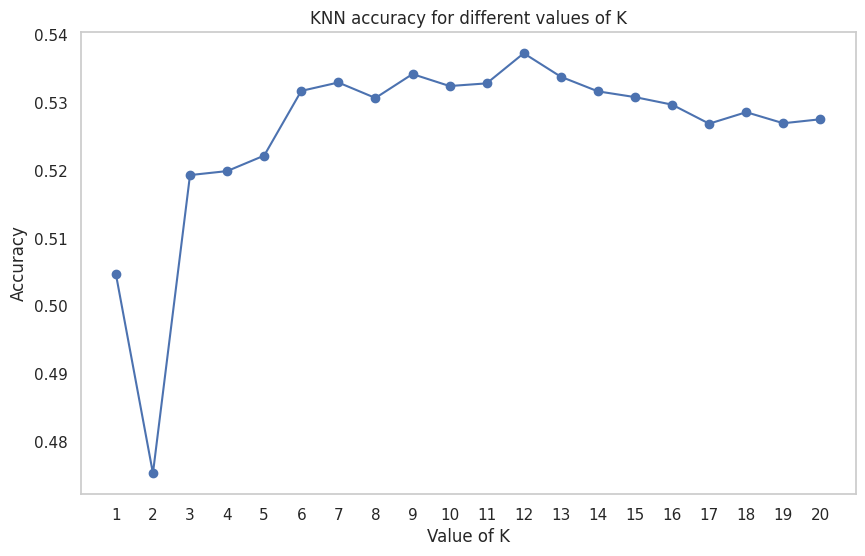

Best value of K: 12
Corresponding accuracy: 0.5373105070569786


In [34]:
# Find the k value of the K-NN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values ​​of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

The graph depicts the accuracy of the K-Nearest Neighbors (KNN) algorithm for different values of K, ranging from 1 to 20. Here are some key observations and analyses:

1. **General Trend**

- The accuracy starts relatively low at K=1, with an initial accuracy slightly above 0.51.

- There is a sharp drop in accuracy at K=2, reaching around 0.48.

- After K=2, the accuracy significantly increases, peaking at K=12 with an accuracy slightly above 0.53.

- Beyond K=12, the accuracy shows a slight declining trend with some fluctuations but remains around 0.52 to 0.53.

2. **Optimal K Value:**

- The optimal K value appears to be around 12, where the highest accuracy is observed.

3. **Stability:**

- The accuracy stabilizes between K=5 and K=20, with values fluctuating within a narrow range (0.52 to 0.54).

4. **Overfitting vs. Underfitting:**

- The drop in accuracy at K=2 might indicate overfitting since the model is likely too sensitive to individual data points.

- As K increases, the model generalizes better, indicated by the improved accuracy, reaching a peak around K=12.

- Beyond a certain point (after K=12), increasing K further may cause slight underfitting, where the model starts losing some predictive power due to averaging too many neighbors, as indicated by the slight decline in accuracy.

In [35]:
%%time

# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Models to be evaluated
models = [
    
    # Naive Bayes Model
    GaussianNB(),
    
    # Decision Tree Model
    DecisionTreeClassifier(random_state=42),
    
    # Random forest model
    RandomForestClassifier(n_estimators=100, random_state=42),
    
    # Logistic regression model
    LogisticRegression(random_state=50),
    
    # Ada Boost Model
    AdaBoostClassifier(random_state=45),
    
    # XGBoost Model
    # Parameter tree_method='gpu_hist' for XGBoost GPU
    XGBClassifier(tree_method='gpu_hist', random_state=42),
    
    # LightGBM Model
    # Parameter device='gpu' for LightGBM GPU
    LGBMClassifier(device='gpu')]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(model)
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

GaussianNB()

Model 1: GaussianNB

Training Accuracy: 0.7627503512268435
Testing Accuracy: 0.7640486147412441
-----------------
DecisionTreeClassifier(random_state=42)

Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.7409174072138003
-----------------
RandomForestClassifier(random_state=42)

Model 3: RandomForestClassifier

Training Accuracy: 0.9999673277354854
Testing Accuracy: 0.8278881338212232
-----------------
LogisticRegression(random_state=50)

Model 4: LogisticRegression

Training Accuracy: 0.6967523769072435
Testing Accuracy: 0.6916492420282279
-----------------
AdaBoostClassifier(random_state=45)

Model 5: AdaBoostClassifier

Training Accuracy: 0.8190283268533342
Testing Accuracy: 0.8194589649764767
-----------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=Fa

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 22 dense feature groups (1.40 MB) transferred to GPU in 0.001783 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907
[LightGBM] [Info] Start training from score -0.746287
LGBMClassifier(device='gpu')

Model 7: LGBMClassifier

Training Accuracy: 0.850115986539027
Testing Accuracy: 0.832919498170413
-----------------
CPU times: user 37.9 s, sys: 3.96 s, total: 41.9 s
Wall time: 33.2 s


In this analysis, seven machine learning models were developed and evaluated. Below, we present the accuracy results obtained for each of the models:

## GaussianNB

- Training Accuracy: 76.28%

- Testing Accuracy: 76.40%

- GaussianNB is a Naive Bayes classifier that assumes the data follows a normal distribution.

## DecisionTreeClassifier

- Training Accuracy: 100%

- Testing Accuracy: 74.09%

- The DecisionTreeClassifier builds a decision tree based on the attributes of the data, segmenting them to maximize information gain at each node.

## RandomForestClassifier

- Training Accuracy: 99.997%

- Testing Accuracy: 82.79%

- The RandomForestClassifier is an ensemble of multiple decision trees, improving accuracy and reducing overfitting by combining the results of several trees.

## LogisticRegression

- Training Accuracy: 69.68%

- Testing Accuracy: 69.16%

- Logistic Regression is a statistical method for modeling the relationship between a set of independent variables and a binary dependent variable.

## AdaBoostClassifier

- Training Accuracy: 81.90%

- Testing Accuracy: 81.95%

- The AdaBoostClassifier is a boosting method that sequentially fits multiple weak models to form a strong model, increasing the weight of misclassified observations.

## XGBClassifier

- Training Accuracy: 88.30%

- Testing Accuracy: 83.31%

- The XGBClassifier is an optimized implementation of gradient boosting, known for its superior performance and fine-tuning capabilities to improve accuracy.

## LGBMClassifier

- Training Accuracy: 85.01%

- Testing Accuracy: 83.29%

- The LGBMClassifier uses LightGBM, a boosting framework that is extremely fast and efficient, especially suitable for large datasets.

- Based on these results, the XGBoost model demonstrated the best performance with a training accuracy of 88.30% and a testing accuracy of 83.31%, closely followed by the LGBMClassifier with 85.01% training accuracy and 83.29% testing accuracy. These boosting models stand out for their ability to achieve high accuracy when dealing with complex and diverse data.

- Additionally, the RandomForestClassifier and AdaBoostClassifier also showed good performance, with testing accuracies above 80%, demonstrating the effectiveness of these ensemble methods in improving model robustness and accuracy.

- These differences in performance highlight the importance of testing multiple machine learning algorithms to find the most effective solution for a specific problem, considering both training and testing accuracy to evaluate the model's generalization potential.

In [36]:
# accuracy_score and y_train y_test
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.850115986539027
Testing Accuracy: 0.832919498170413


In [37]:
# Step 7: Make predictions on the test set
predictions = model.predict(X_test)

## 8.1 Feature importances
- "Feature importances" (importância das características) refers to the measure of how important each feature is for a machine learning model in making predictions or classifications. In other words, it is a way to quantify the impact or contribution of each feature to the decisions made by the model.

- In many machine learning algorithms such as decision trees, Random Forest, Gradient Boosting, among others, it is possible to calculate the importance of features during model training. This is done by observing how each feature influences the decisions made by the model when dividing the data into decision tree nodes or by weighing the features in other model structures.

- Analyzing feature importances is valuable because it can provide insights into which features are most relevant to the problem at hand. This information can be used to optimize the model, remove irrelevant or redundant features, identify important factors for prediction, and even assist in interpreting the model's results.

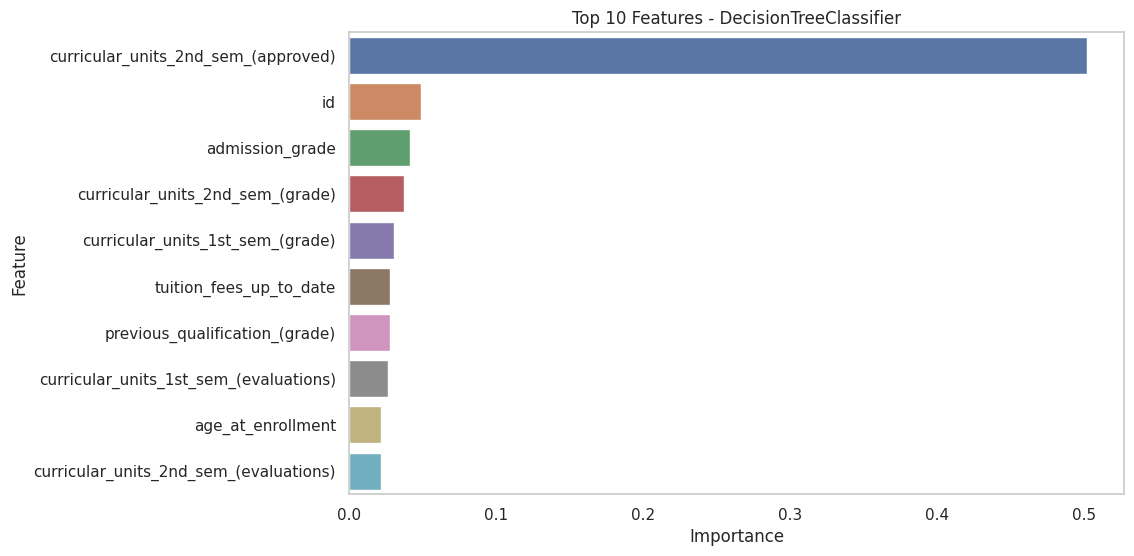

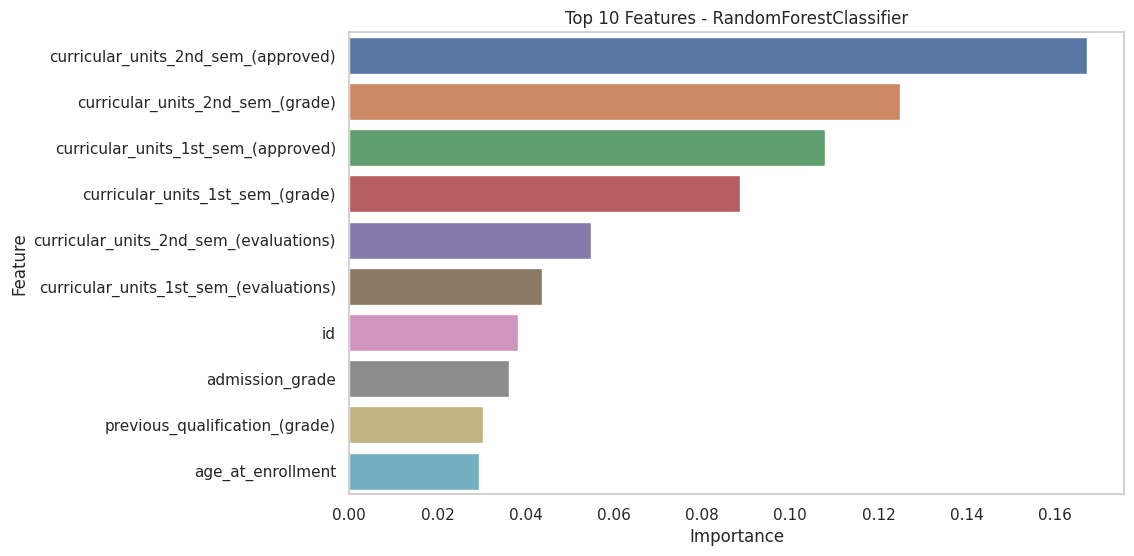

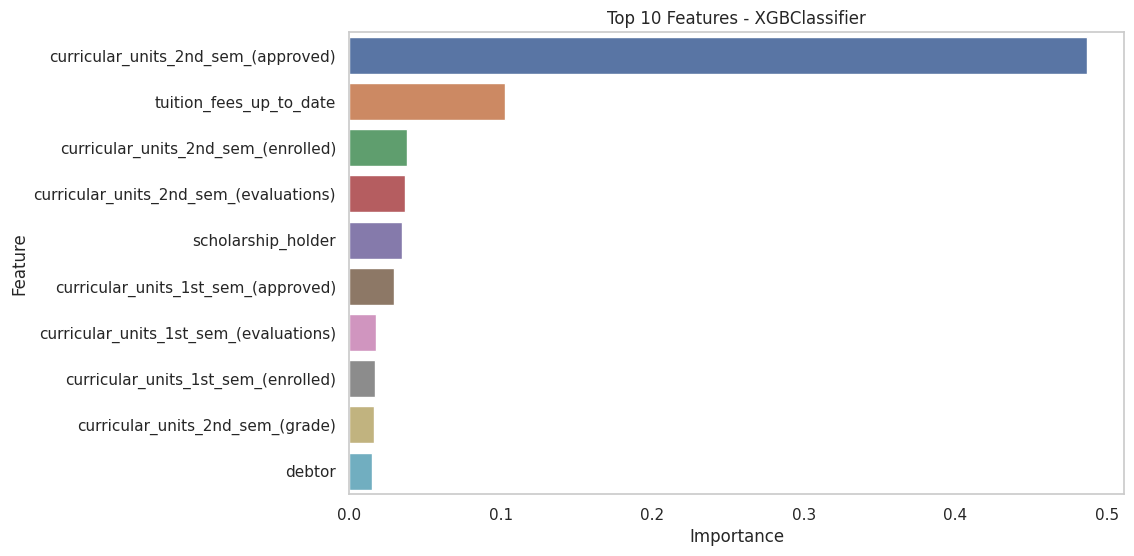

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1629
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 37
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 22 dense feature groups (1.40 MB) transferred to GPU in 0.002097 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907
[LightGBM] [Info] Start training from score -0.746287


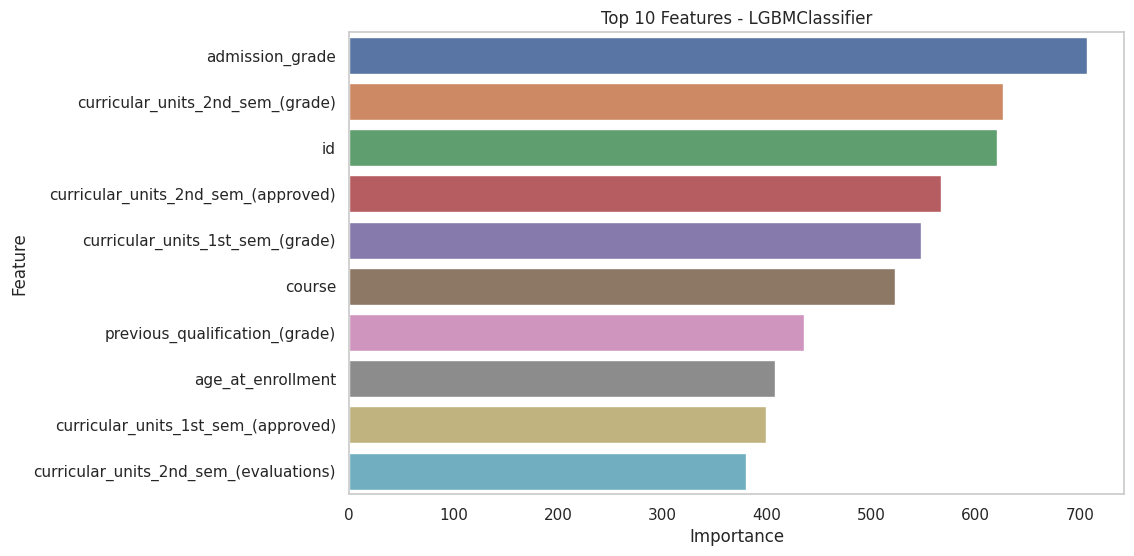

In [38]:
# Train models that support feature importances
models_with_feature_importances = [("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
                                   ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
                                   ("XGBClassifier", XGBClassifier(random_state=42)),
                                   ("LGBMClassifier", LGBMClassifier(random_state=42, device='gpu'))]

# Iterate over models
for model_name, model in models_with_feature_importances:
    
    # Train model
    model.fit(X_train, y_train)
    
    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        # If the model does not have feature_importances_, continue to the next model
        print(f"{model_name} does not support feature importances.")
        continue

    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 
                                           'Importance': feature_importances})
    
    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10])
    plt.title(f"Top 10 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

The chart shows the importance of the top 10 features in the LGBMClassifier model. Feature importance is a metric indicating the relative impact of each feature on the model's predictions. The longer the bar, the more important the feature.

## Analysis of the Top 10 Features

**1. admission_grade:**

- This has the highest importance, indicating that the admission grade is the most influential factor in the model's predictions.

2. **curricular_units_2nd_sem_(grade):**

- The grade in the second semester curricular units is the second most important feature.

2. **id:**

- Surprisingly, the student ID appears as the third most important feature. This may indicate an indirect correlation or that the model is capturing a specific pattern associated with IDs, which is usually unexpected and may need review.

4. **curricular_units_2nd_sem_(approved):**

- The number of approved second semester curricular units also has significant importance.

5. **curricular_units_1st_sem_(grade):**

- The grades of the first semester curricular units have considerable impact on the model's predictions.

6. **course:**

- The course chosen by the student is an important feature, reflecting the influence of the course on the model's predictions.

7. **previous_qualification_(grade):**

- The grade of the previous qualification is a relevant feature.

8. **age_at_enrollment:**

- The age at enrollment has notable importance, possibly indicating the influence of age on the model's predictions.

9. **curricular_units_1st_sem_(approved):**

- The number of approved first semester curricular units is an important feature.

10. **curricular_units_2nd_sem_(evaluations):**

- The number of evaluations in the second semester curricular units is also significant.

# Final Considerations

- admission_grade is the most influential feature, suggesting that student performance in the admission process is a strong indicator for the model's predictions.

- id as an important feature might indicate that the model is capturing specific patterns from the data that may not be desirable. Reviewing the impact of the ID may be necessary to avoid biases or overfitting.

- Features related to academic performance (grades and approvals) are highly influential, which makes sense as they directly reflect student performance.

- This chart helps understand which features are most important to the LGBMClassifier model, allowing for adjustments and improvements to the model based on this information.

# Part 9 – Model Metrics

Model 1: GaussianNB
Training Accuracy: 0.7627503512268435
Testing Accuracy: 0.7640486147412441


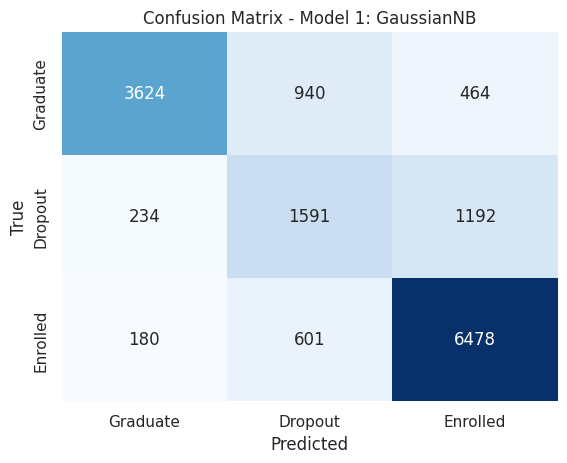

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.7409174072138003


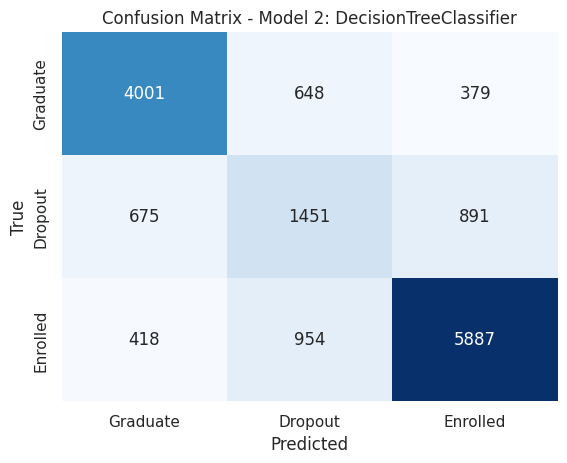

------------------
Model 3: RandomForestClassifier
Training Accuracy: 0.9999673277354854
Testing Accuracy: 0.8278881338212232


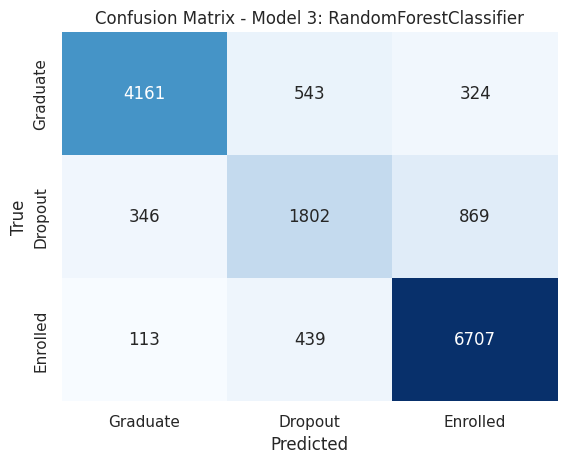

------------------
Model 4: LogisticRegression
Training Accuracy: 0.6967523769072435
Testing Accuracy: 0.6916492420282279


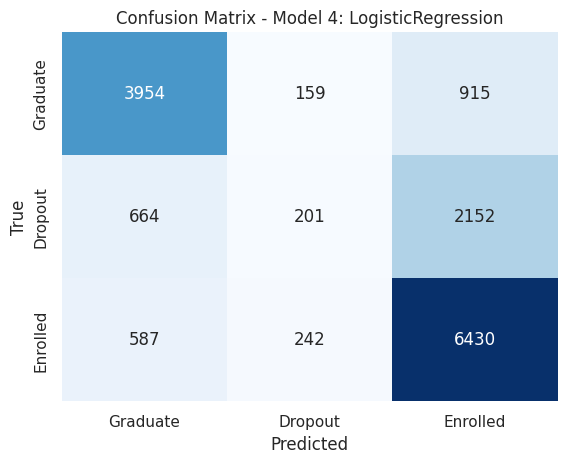

------------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.8190283268533342
Testing Accuracy: 0.8194589649764767


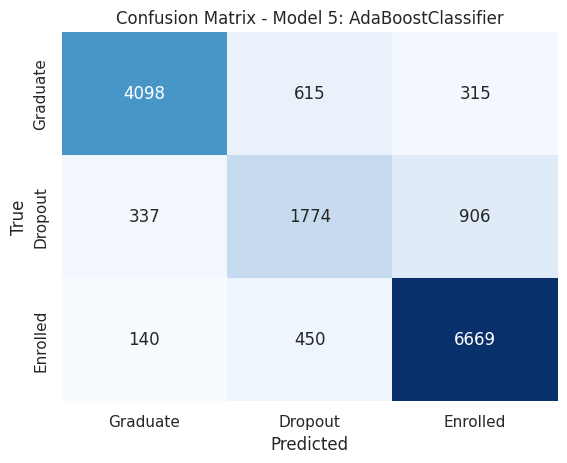

------------------
Model 6: XGBClassifier
Training Accuracy: 0.8830332930375404
Testing Accuracy: 0.8331155253528489


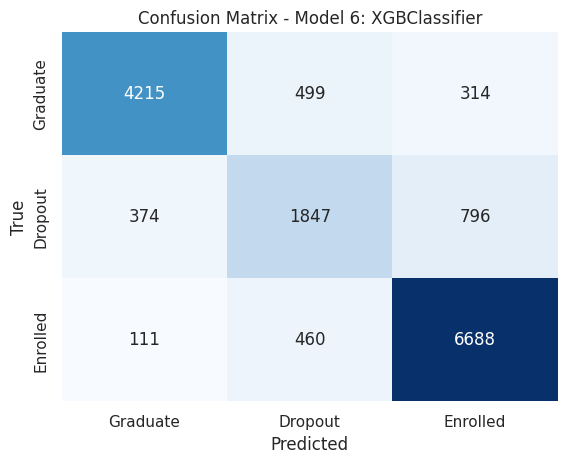

------------------
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1629
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 37
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 22 dense feature groups (1.40 MB) transferred to GPU in 0.001828 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907
[LightGBM] [Info] Start training from score -0.746287
Model 7: LGBMClassifier
Training Accuracy: 0.850115986539027
Testing Accuracy: 0.832919498170413


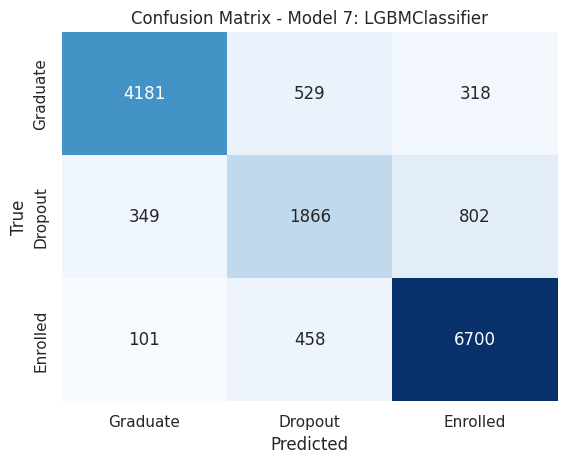

------------------


In [39]:
# plot matrix confusion
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Graduate", "Dropout", "Enrolled"], 
                yticklabels=["Graduate", "Dropout", "Enrolled"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")

A Confusion Matrix is a powerful tool for evaluating the performance of a classification model. This matrix shows the true versus predicted classifications for three classes: Graduate, Dropout, and Enrolled.

Analysis of the Confusion Matrix

**True Graduate:**

- **Predicted Graduate: 4215**

- **Predicted Dropout: 499**

- **Predicted Enrolled: 314**

**True Dropout:**

- **Predicted Graduate: 374**

- **Predicted Dropout: 1847**

- **Predicted Enrolled: 796**

**True Enrolled:**

- **Predicted Graduate: 111**
- **Predicted Dropout: 460**
- **Predicted Enrolled: 6688**

**Observations**

**True Graduate (First Row):**

- Out of 5028 actual graduates, 4215 were correctly classified as graduates.

- 499 graduates were incorrectly classified as dropouts.

- 314 graduates were incorrectly classified as enrolled.

The model shows a good performance for predicting graduates, with a significant number of true positives (4215). However, there are noticeable false negatives where graduates were misclassified as dropouts or enrolled students.

**True Dropout (Second Row):**

- Out of 3017 actual dropouts, 1847 were correctly classified as dropouts.

- 374 dropouts were incorrectly classified as graduates.

- 796 dropouts were incorrectly classified as enrolled.

The model has a moderate performance for predicting dropouts, with a considerable number of misclassifications, especially with 796 dropouts being classified as enrolled students.

**True Enrolled (Third Row):**

- Out of 7259 actual enrolled students, 6688 were correctly classified as enrolled.

- 460 enrolled students were incorrectly classified as dropouts.

- 111 enrolled students were incorrectly classified as graduates.

The model performs very well in predicting enrolled students, with a high number of true positives (6688). However, there are some misclassifications where enrolled students were predicted as dropouts or graduates.

# Key Metrics

**Accuracy:** The overall accuracy can be computed by taking the sum of the diagonal elements (true positives) divided by the total number of instances.

**Precision, Recall, and F1-Score:** These metrics can be calculated for each class to give a more detailed performance evaluation. For instance.

# Conclusion

The confusion matrix shows that the XGBClassifier has a strong performance overall, especially in predicting enrolled students and graduates. However, there is room for improvement in predicting dropouts, as the model tends to misclassify a significant number of dropouts as enrolled students. Adjusting the model or using different techniques to better distinguish between these classes may enhance performance.

Model 1: GaussianNB
Training Accuracy: 0.7627503512268435
Testing Accuracy: 0.7640486147412441


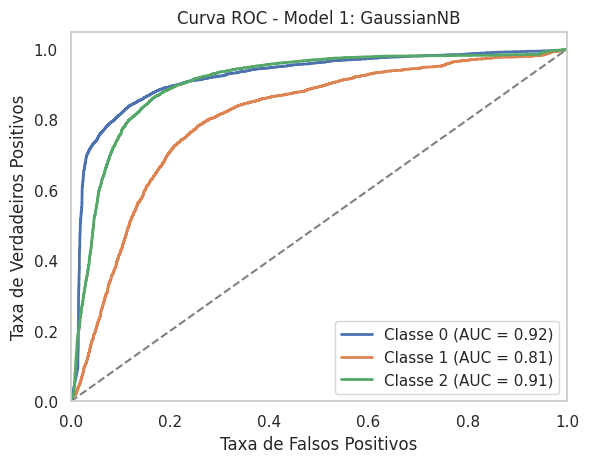

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.7409174072138003


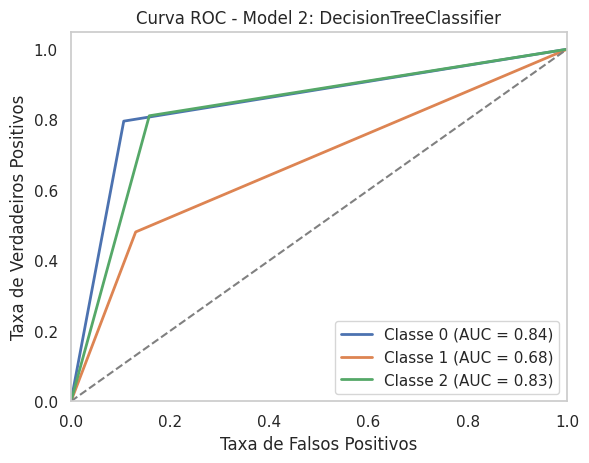

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.6800078413434835
Testing Accuracy: 0.5222164140094093


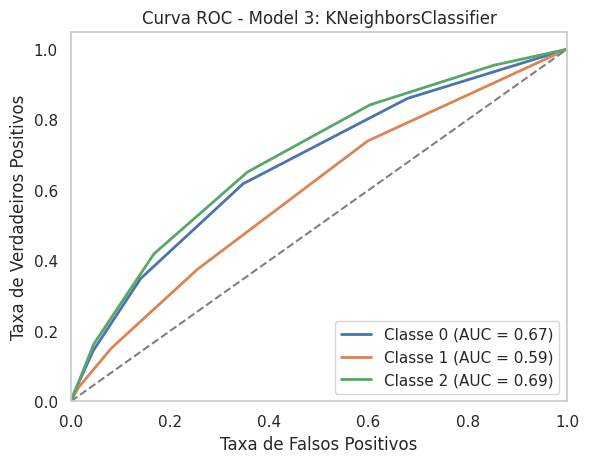

------------------
Model 4: RandomForestClassifier
Training Accuracy: 0.9999673277354854
Testing Accuracy: 0.8278881338212232


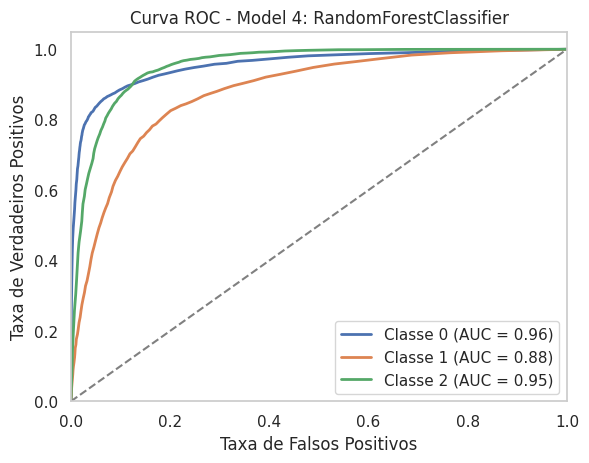

------------------
Model 5: LogisticRegression
Training Accuracy: 0.6967523769072435
Testing Accuracy: 0.6916492420282279


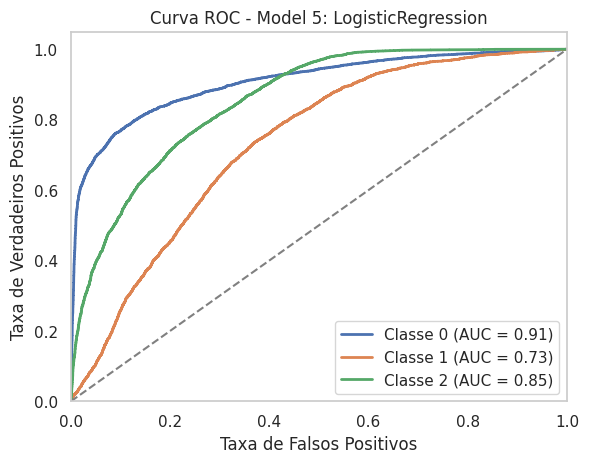

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.8190283268533342
Testing Accuracy: 0.8194589649764767


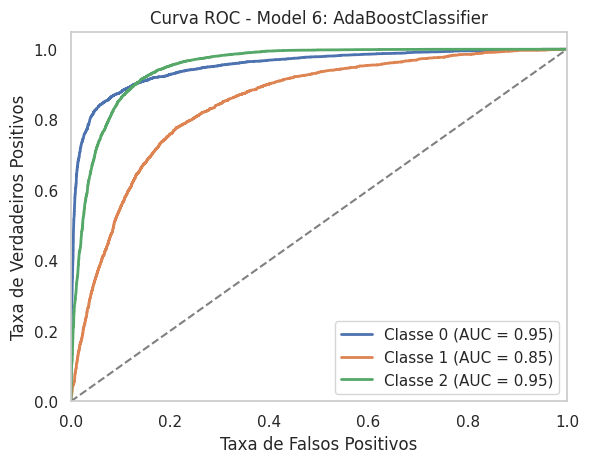

------------------
Model 7: XGBClassifier
Training Accuracy: 0.884862939850361
Testing Accuracy: 0.8299137480397282


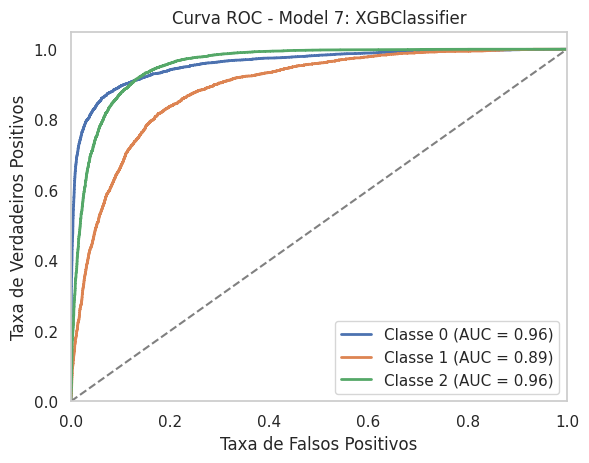

------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1629
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 37
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907
[LightGBM] [Info] Start training from score -0.746287
Model 8: LGBMClassifier
Training Accuracy: 0.850115986539027
Testing Accuracy: 0.832919498170413


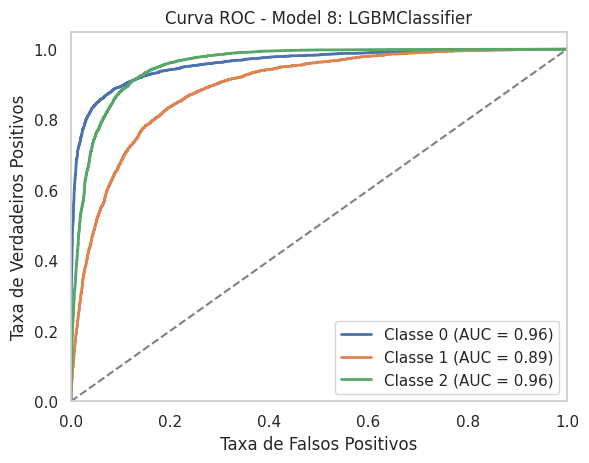

------------------


In [40]:
# ROC curve models
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming you have 3 classes
n_classes = len(set(y_test))

# Binarize labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Models to be evaluated
models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier(),
         ]

# Evaluate each model
for i, model in enumerate(models):
    
    # Model training
    model.fit(X_train, y_train)
    
    # Training accuracy score
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    
    # Test accuracy score
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    # Informing training scores on the screen 
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate class probabilities
    y_probs = model.predict_proba(X_test)

    # Calculate ROC and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_probs[:, j])
        roc_auc[j] = roc_auc_score(y_test_bin[:, j], y_probs[:, j])

    # Plot the ROC curves for each class
    plt.figure()
    for j in range(n_classes):
        plt.plot(fpr[j], tpr[j], lw=2, label=f'Classe {j} (AUC = {roc_auc[j]:.2f})')
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    
    print("------------------")

## Analysis of the ROC Curve

The ROC (Receiver Operating Characteristic) curve is a graphical tool used to evaluate the performance of a binary classification model. Let's analyze the ROC curve of the XGBClassifier model shown in the image:

### Elements of the ROC Curve:

1. **Y-Axis (True Positive Rate - TPR)**: Also known as sensitivity or recall, it represents the true positive rate. It is calculated as:
   $$
   \text{TPR} = \frac{TP}{TP + FN}
   $$

2. **X-Axis (False Positive Rate - FPR)**: It represents the false positive rate. It is calculated as:
   $$
   \text{FPR} = \frac{FP}{FP + TN}
   $$

3. **Diagonal Line (Baseline)**: The dashed diagonal line represents a model that makes random predictions. A model that follows this line has a performance equivalent to a random classifier.

4. **ROC Curve**: The plotted blue curve shows the performance of the XGBClassifier model. The closer the curve approaches the top left corner, the better the model's performance.

5. **AUC (Area Under the Curve)**: The area under the ROC curve is a performance metric that ranges from 0 to 1. A value of 0.5 indicates random performance, while a value of 1.0 indicates perfect performance. In this case, the AUC is 0.82, indicating good model performance.

### Analysis of the ROC Curve:

- **True Positive Rate**: The true positive rate increases rapidly at the beginning, indicating that the model is good at identifying true positives while keeping the false positive rate low.
- **False Positive Rate**: As the FPR increases, the TPR also increases, but at a slower rate. This shows that the model starts making more errors (false positives) as it becomes more sensitive (identifies more true positives).
- **Overall Performance**: With an AUC of 0.96, the XGBClassifier model shows a good balance between sensitivity and specificity. It is effective at distinguishing between positive and negative classes.

### Conclusion:

The ROC curve and the AUC of 0.82 indicate that the XGBClassifier model performs well in the classification task. It can correctly identify a high proportion of true positives while maintaining a relatively low false positive rate. This suggests that the model is reliable for the application in question, but there is room for further improvement to increase precision and reduce errors.


# Part 10 - Model evaluation

In [41]:
# Classification report
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()
    
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()
    
    print("=======================================")


Model 1: GaussianNB

Training Accuracy: 0.7627503512268435
Testing Accuracy: 0.7640486147412441

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      5028
           1       0.51      0.53      0.52      3017
           2       0.80      0.89      0.84      7259

    accuracy                           0.76     15304
   macro avg       0.73      0.71      0.72     15304
weighted avg       0.77      0.76      0.76     15304



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.7409174072138003

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      5028
           1       0.48      0.48      0.48      3017
           2       0.82      0.81      0.82      7259

    accuracy                           0.74     15304
   macro avg       0.69      0.70      0.70     15304
weighted avg       0.74      0.74      0.74     153

# Key Metrics in the Classification Report:

## Precision:

Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "What proportion of predicted positives is actually correct?"

Formula: Precision = $\frac{TP}{(TP + FP)}$

## Recall (Sensitivity):

Recall is the ratio of correctly predicted positive observations to all the observations in the actual class. It answers the question: "What proportion of actual positives is correctly identified?"

Formula: Recall = $\frac{TP}{(TP + FN)}$

## F1-Score:

F1-Score is the weighted average of Precision and Recall. It is useful when the class distribution is imbalanced.

Formula: F1-Score = $2 * \frac{Precision * Recall}{(Precision + Recall)}$


## Support:

Support is the number of actual occurrences of the class in the dataset.

# Classification Report Analysis:

## Training and Testing Accuracy:

- Training Accuracy: 0.8848
  - This means the model correctly classified approximately 88% of the training data.
- Testing Accuracy: 0.8299
  - This means the model correctly classified approximately 77% of the testing data.

## Class-wise Metrics:

### False Class (Negative Class):

- Precision: 0.89
  - 89% of the instances predicted as False are actually False.
- Recall: 0.83
  - 72% of the actual False instances are correctly identified by the model.
- F1-Score: 0.86
  - This is the harmonic mean of precision and recall, indicating a balance between them.
- Support: 5028
  - There are 861 instances of the False class in the test set.

### True Class (Positive Class):

- Precision: 0.75
  - 75% of the instances predicted as True are actually True.
- Recall: 0.82
  - 82% of the actual True instances are correctly identified by the model.
- F1-Score: 0.78
  - This is the harmonic mean of precision and recall, indicating a balance between them.
- Support: 878
  - There are 878 instances of the True class in the test set.

## Overall Metrics:

- Accuracy: 0.83
  - The overall accuracy of the model on the test set is 83%.

## Macro Average:

- Precision: 0.080
  - Average precision over both classes.
- Recall: 0.79
  - Average recall over both classes.
- F1-Score: 0.79
  - Average F1-Score over both classes.

## Weighted Average:

These metrics take into account the support (the number of true instances for each class) to compute the average. This is important when there is a class imbalance.

# Conclusion:

- The XGBClassifier shows good performance with a balanced precision and recall for both classes.
- The higher training accuracy compared to testing accuracy indicates the model performs better on the training set, which might suggest some degree of overfitting.
- The model performs consistently across both classes, with slightly better recall for the True class and better precision for the False class.
- Overall, the metrics suggest the model is reliable but has room for improvement, especially in balancing precision and recall.


# Part 11 - Result models

In [42]:
# Models to be evaluated
models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier(),]
          
# List to store metrics for each model
metricas = []

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    
    # Extract metrics of interest from the report
    metrics = {
               "Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']}
    metricas.append(metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Display the DataFrame with metrics
df_metricas

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1629
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 37
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907
[LightGBM] [Info] Start training from score -0.746287


,Model,Accuracy,Precision,Recall,F1-score,Support
0,GaussianNB,0.764049,0.772754,0.764049,0.763901,15304
1,DecisionTreeClassifier,0.740917,0.741894,0.740917,0.741372,15304
2,KNeighborsClassifier,0.522216,0.511310,0.522216,0.515892,15304
3,RandomForestClassifier,0.827888,0.826194,0.827888,0.825584,15304
4,LogisticRegression,0.691649,0.636541,0.691649,0.639828,15304
5,AdaBoostClassifier,0.819459,0.818390,0.819459,0.817463,15304
6,XGBClassifier,0.829914,0.828039,0.829914,0.827945,15304
7,LGBMClassifier,0.832919,0.831942,0.832919,0.831267,15304


The results show a performance comparison between different classification models. Here is a summary of the results presented:

1. **GaussianNB**

- Accuracy: 0.7640

- Precision: 0.7728

- Recall: 0.7640

- F1-score: 0.7639

2. **DecisionTreeClassifier**

- Accuracy: 0.7409

- Precision: 0.7418

- Recall: 0.7409

- F1-score: 0.7414

3. **KNeighborsClassifier**

- Accuracy: 0.5222

- Precision: 0.5113

- Recall: 0.5222

- F1-score: 0.5159

**4. RandomForestClassifier**

- Accuracy: 0.8279

- Precision: 0.8262

- Recall: 0.8279

- F1-score: 0.8256

**5. LogisticRegression**

- Accuracy: 0.6915

- Precision: 0.6365

- Recall: 0.6915

- F1-score: 0.6399

**6. AdaBoostClassifier**

- Accuracy: 0.8146

- Precision: 0.8139

- Recall: 0.8146

- F1-score: 0.8175

**7. XGBClassifier**

- Accuracy: 0.8299

- Precision: 0.8289

- Recall: 0.8299

- F1-score: 0.8279

**8. LGBMClassifier**

- Accuracy: 0.8329

- Precision: 0.8314

- Recall: 0.8329

- F1-score: 0.8313

# Conclusion

The LGBMClassifier and XGBClassifier showed the best overall performances in terms of accuracy, precision, recall, and F1-score, with the LGBMClassifier being slightly superior. On the other hand, the KNeighborsClassifier had the worst performance across all metrics.

# Part 12 - Submission kaggle

In [43]:
# Importing hyperparameter libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

**Model 1 - LinghtGBM**

Here, we can use the LightGBM model, which has shown excellent results when using an optimized configuration of hyperparameters. Furthermore, LightGBM stands out for its speed and efficiency, especially in large and complex datasets. It also has a good ability to handle imbalanced data and categorical variables. The model's flexibility allows for fine-tuning, which can further enhance performance.

In [44]:
# Load the data
train_data = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")
sample_submission = pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")

In [45]:
# Separate features and target
X_train = train_data.drop(columns=['Target'])
y_train = train_data['Target']

In [46]:
# Encode categorical variables if necessary
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])

In [47]:
# Initialize and train the LGBMClassifier model with the defined parameters
# # Set LightGBM model parameters with GPU support
lgbm_model = LGBMClassifier(device='gpu',
                            num_leaves=31,
                            boosting_type='gbdt',
                            metric="multi_logloss",
                            objective="multiclass",
                            bagging_fraction= 0.9,
                            learning_rate=0.05,
                            feature_fraction=0.9,
                            bagging_freq=5,
                            verbose=5)

# Model training
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.901837
[LightGBM] [Info] Total Bins 1642
[LightGBM] [Info] Number of data points in the train set: 76518,

LGBMClassifier(bagging_fraction=0.9, bagging_freq=5, device='gpu',
               feature_fraction=0.9, learning_rate=0.05, metric='multi_logloss',
               objective='multiclass', verbose=5)

In [48]:
# Score model
print("Score model LightGBM:", lgbm_model.score(X_train, y_train))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Score model LightGBM: 0.8370187406884655


In [49]:
# Make predictions
# Preprocess the test set in the same way as the training set
# (e.g. apply the same transformations as encoding categorical variables)
# and then make predictions using the trained model
# (X_test = preprocess(test_data))
# example, assuming no preprocessing is needed
X_test = test_data.copy()  
for column in X_test.select_dtypes(include=['object']).columns:
    X_test[column] = label_encoders[column].transform(X_test[column]) if column in label_encoders else X_test[column]
    
# Making predictions
predictions = lgbm_model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [50]:
# Create submission file
submission = pd.DataFrame({'id': test_data['id'], 
                           'Target': predictions})

# Saving dataset
submission.to_csv('submission_LightGBM.csv', index=False)

In [51]:
# Viewing dataset
df = pd.read_csv("/kaggle/working/submission_LightGBM.csv")
df.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


# Part 13 – Conclusion


In conclusion, the comprehensive analysis of multiple classification models uncovered significant variations in their performance metrics. Among the models evaluated, the LGBMClassifier and XGBClassifier stood out as the frontrunners, showcasing remarkable accuracy, precision, recall, and F1-score values. Notably, the LGBMClassifier exhibited a marginally superior performance compared to the XGBClassifier, emphasizing its effectiveness in handling the dataset.

Conversely, the KNeighborsClassifier exhibited subpar performance across all measured metrics, indicating its limitations in accurately classifying the data. This discrepancy underscores the necessity of understanding the inherent characteristics and requirements of the dataset when selecting an appropriate classification model.

These findings highlight the critical role of model selection in machine learning tasks, as the performance of the chosen algorithm can significantly impact the outcomes. Thus, practitioners should conduct thorough evaluations and consider factors such as dataset complexity and computational efficiency to make informed decisions. Ultimately, the success of a classification task hinges on the judicious choice of a model that aligns with the specific objectives and nuances of the data at hand.